In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Import games data
df_games = pd.read_csv('/Users/koplo/Documents/chess_analysis_proj/game_game_info.csv')
df_games.head()

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,ply_count,date_created,file_name
0,58887a86-5c84-45ac-b959-c72377a2dfd3,1,Rated Rapid game,https://lichess.org/hvfE6FOz,2021.09.22,?,awfedorable,K0P0L0,0-1,1963,...,-74,B33,Normal,600+0,2021.09.22,18:21:58,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
1,aadc9778-0bad-4f79-90c5-569e09efb592,2,Rated Rapid game,https://lichess.org/7TtUO2i1,2021.09.22,?,K0P0L0,kaffeberra,1-0,1883,...,37,C41,Normal,600+0,2021.09.22,18:12:31,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
2,1095f764-8e18-4a29-a9fd-6e9e497a5314,3,Rated Rapid game,https://lichess.org/xNfCZlPq,2021.09.22,?,K0P0L0,amingh68,1-0,1878,...,28,B12,Normal,600+0,2021.09.22,18:00:24,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
3,44978ca9-381d-484b-a372-c7f6a16dc125,4,Rated Rapid game,https://lichess.org/9yvXxjGy,2021.09.22,?,K0P0L0,synergylove,1-0,1871,...,-53,B12,Normal,600+0,2021.09.22,17:44:10,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
4,7facda9f-1d81-4bc3-9f85-d607a17eca72,5,Rated Rapid game,https://lichess.org/SjlKy449,2021.09.22,?,Bakery_Maggot,K0P0L0,1-0,1850,...,-27,A46,Normal,600+0,2021.09.22,17:36:25,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn


In [3]:
df_games.columns

Index(['game_id', 'game_order', 'event', 'site', 'date_played', 'round',
       'white', 'black', 'result', 'white_elo', 'white_rating_diff',
       'black_elo', 'black_rating_diff', 'white_title', 'black_title',
       'winner', 'winner_elo', 'loser', 'loser_elo', 'winner_loser_elo_diff',
       'eco', 'termination', 'time_control', 'utc_date', 'utc_time', 'variant',
       'ply_count', 'date_created', 'file_name'],
      dtype='object')

In [4]:
# Clean the dataframe from unnecessary events
df_games = df_games[((df_games['event'] == 'Rated Blitz game') 
    | (df_games['event'] == 'Rated Bullet game')
    | (df_games['event'] == 'Rated Rapid game') 
    | (df_games['event'] == 'Rated Classical game'))]
df_games.value_counts('event')

event
Rated Blitz game        6117
Rated Bullet game        455
Rated Rapid game         198
Rated Classical game      12
dtype: int64

In [5]:
df_games.dtypes

game_id                   object
game_order                 int64
event                     object
site                      object
date_played               object
round                     object
white                     object
black                     object
result                    object
white_elo                 object
white_rating_diff        float64
black_elo                 object
black_rating_diff        float64
white_title              float64
black_title              float64
winner                    object
winner_elo                object
loser                     object
loser_elo                 object
winner_loser_elo_diff      int64
eco                       object
termination               object
time_control              object
utc_date                  object
utc_time                  object
variant                   object
ply_count                float64
date_created              object
file_name                 object
dtype: object

In [6]:
# Set columns to correct types
df_games[['white_elo', 'black_elo', 'winner_elo', 'loser_elo']] = df_games[['white_elo', 'black_elo',
                                                                'winner_elo', 'loser_elo']].apply(pd.to_numeric)
df_games.dtypes

game_id                   object
game_order                 int64
event                     object
site                      object
date_played               object
round                     object
white                     object
black                     object
result                    object
white_elo                  int64
white_rating_diff        float64
black_elo                  int64
black_rating_diff        float64
white_title              float64
black_title              float64
winner                    object
winner_elo               float64
loser                     object
loser_elo                float64
winner_loser_elo_diff      int64
eco                       object
termination               object
time_control              object
utc_date                  object
utc_time                  object
variant                   object
ply_count                float64
date_created              object
file_name                 object
dtype: object

In [7]:
# Add opening name from eco code
file = '/Users/koplo/Documents/chess_analysis_proj/chess_openings.csv'
openings_dict = {rows[0]:rows[1] for rows in csv.reader(open(file))}
df_games['opening'] = df_games['eco'].apply(lambda row: openings_dict.get(row))
df_games['opening']

0                      Sicilian
1              Philidor Defense
2             Caro-Kann Defense
3             Caro-Kann Defense
4             Queen's Pawn Game
                 ...           
6888               Scandinavian
6889               Scandinavian
6890    Sicilian, 2.f4 and 2.d4
6891    Queen's Gambit Declined
6892           Philidor Defense
Name: opening, Length: 6782, dtype: object

In [8]:
# Add useful columns to the dataframe
username = 'K0P0L0'
def label_result_type(row):
    if row['winner'] == username:
        return 'win'
    if row['winner'] == 'draw':
        return 'draw'
    return 'loss'
def label_elo_diff(row):
    if row['white'] == username:
        return row['white_elo'] - row['black_elo']
    return row['black_elo'] - row['white_elo']
def label_opening(row, color):
    if row[color] == username:
        return row['opening']
    return None
def my_elo(row):
    if row['white'] == username:
        return row['white_elo']
    return row['black_elo']
def my_color(row):
    if row['white'] == username:
        return 'white'
    return 'black'
def elo_diff_range(row):
    if row['elo_diff'] < -20.0:
        return 'less than -20'
    elif row['elo_diff'] >= -20.0 and row['elo_diff'] < 0.0:
        return '-20 - 0'
    elif row['elo_diff'] >= 0.0 and row['elo_diff'] < 20.0:
        return '0 - 20'
    elif row['elo_diff'] >= 20.0:
        return 'more than 20'

df_games['result_type'] = df_games.apply(label_result_type, axis = 1)
df_games['elo_diff'] = df_games.apply(label_elo_diff, axis = 1)
df_games['white_opening'] = df_games.apply(lambda row: label_opening(row, 'white'), axis = 1)
df_games['black_opening'] = df_games.apply(lambda row: label_opening(row, 'black'), axis = 1) 
df_games['my_elo'] = df_games.apply(my_elo, axis = 1)
df_games['my_color'] = df_games.apply(my_color, axis = 1)
df_games['elo_diff_range'] = df_games.apply(elo_diff_range, axis = 1)
df_games.columns

Index(['game_id', 'game_order', 'event', 'site', 'date_played', 'round',
       'white', 'black', 'result', 'white_elo', 'white_rating_diff',
       'black_elo', 'black_rating_diff', 'white_title', 'black_title',
       'winner', 'winner_elo', 'loser', 'loser_elo', 'winner_loser_elo_diff',
       'eco', 'termination', 'time_control', 'utc_date', 'utc_time', 'variant',
       'ply_count', 'date_created', 'file_name', 'opening', 'result_type',
       'elo_diff', 'white_opening', 'black_opening', 'my_elo', 'my_color',
       'elo_diff_range'],
      dtype='object')

In [9]:
# Import moves data
df_moves = pd.read_csv('/Users/koplo/Documents/Chess/moves_evaluated.csv')
df_moves

,game_id,move_no,move_no_pair,player,notation,move,from_square,to_square,piece,color,...,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,move_sequence,evaluation
0,58887a86-5c84-45ac-b959-c72377a2dfd3,1,1,awfedorable,e4,e2e4,e2,e4,P,White,...,0,0,0,0,0,0,8,31,e4,+43
1,58887a86-5c84-45ac-b959-c72377a2dfd3,2,1,K0P0L0,c5,c7c5,c7,c5,P,Black,...,0,0,0,0,1,0,7,31,e4|c5,+34
2,58887a86-5c84-45ac-b959-c72377a2dfd3,3,2,awfedorable,Nf3,g1f3,g1,f3,N,White,...,0,0,0,0,1,0,7,31,e4|c5|Nf3,+14
3,58887a86-5c84-45ac-b959-c72377a2dfd3,4,2,K0P0L0,Nc6,b8c6,b8,c6,N,Black,...,0,0,0,0,1,3,7,28,e4|c5|Nf3|Nc6,+35
4,58887a86-5c84-45ac-b959-c72377a2dfd3,5,3,awfedorable,d4,d2d4,d2,d4,P,White,...,0,0,0,0,1,3,7,28,e4|c5|Nf3|Nc6|d4,+52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394976,adc13912-c27f-4342-b2b8-1c101f912eb4,74,37,rezamaku,Qc1+,c4c1,c4,c1,Q,Black,...,9,0,0,0,0,4,2,0,e4|e5|Nf3|d6|Be2|Be7|O-O|Nf6|d4|exd4|Nxd4|c5|N...,#-2
394977,adc13912-c27f-4342-b2b8-1c101f912eb4,75,38,K0P0L0,Rd1,d6d1,d6,d1,R,White,...,9,0,0,0,0,4,2,0,e4|e5|Nf3|d6|Be2|Be7|O-O|Nf6|d4|exd4|Nxd4|c5|N...,#-2
394978,adc13912-c27f-4342-b2b8-1c101f912eb4,76,38,rezamaku,Qxd1+,c1d1,c1,d1,Q,Black,...,9,0,0,0,0,4,2,0,e4|e5|Nf3|d6|Be2|Be7|O-O|Nf6|d4|exd4|Nxd4|c5|N...,#-1
394979,adc13912-c27f-4342-b2b8-1c101f912eb4,77,39,K0P0L0,Ne1,f3e1,f3,e1,N,White,...,9,0,0,0,0,4,2,0,e4|e5|Nf3|d6|Be2|Be7|O-O|Nf6|d4|exd4|Nxd4|c5|N...,#-1


In [10]:
df_moves.columns

Index(['game_id', 'move_no', 'move_no_pair', 'player', 'notation', 'move',
       'from_square', 'to_square', 'piece', 'color', 'fen', 'is_check',
       'is_check_mate', 'is_fifty_moves', 'is_fivefold_repetition',
       'is_game_over', 'is_insufficient_material', 'white_count',
       'black_count', 'white_pawn_count', 'black_pawn_count',
       'white_queen_count', 'black_queen_count', 'white_black_count',
       'black_bishop_count', 'white_knight_count', 'black_knight_count',
       'white_rook_count', 'black_rook_count', 'captured_score_for_white',
       'captured_score_for_black', 'fen_row1_white_count',
       'fen_row2_white_count', 'fen_row3_white_count', 'fen_row4_white_count',
       'fen_row5_white_count', 'fen_row6_white_count', 'fen_row7_white_count',
       'fen_row8_white_count', 'fen_row1_white_value', 'fen_row2_white_value',
       'fen_row3_white_value', 'fen_row4_white_value', 'fen_row5_white_value',
       'fen_row6_white_value', 'fen_row7_white_value', 'fen_row8

In [11]:
# Clear the game that were cleared from the games data
df_moves = df_moves[df_moves.game_id.isin(df_games.game_id)]
df_moves.shape


(389202, 65)

In [12]:
df_moves['evaluation']

0         +43
1         +34
2         +14
3         +35
4         +52
         ... 
394976    #-2
394977    #-2
394978    #-1
394979    #-1
394980    #-0
Name: evaluation, Length: 389202, dtype: object

In [13]:
# Turn the evaluation score to integer, if there is mate set the evaluation to 10000
def to_num(row):
    if '#' not in row['evaluation'] and row['evaluation'] != 'nan':
        return pd.to_numeric(row['evaluation'])
    elif '-' in row['evaluation']:
        return -10000
    return 10000
df_moves = df_moves.assign(evaluation = df_moves.apply(lambda row: to_num(row), axis = 1))

In [14]:
# Split the moves by game id and calculate average evaluation for both players for each game
def calc_avg_eval(df):
    evals = df['evaluation']
    white_eval_diff = []
    black_eval_diff = []
    turn = True # True for White, False for Black
    lasteval = 0
    for eval in evals:
        if turn:
            white_eval_diff.append(max(lasteval - eval, 0))
        else:
            black_eval_diff.append(max(eval - lasteval, 0))
        lasteval = eval
        turn = not turn
    df['white_eval'] = round(sum(white_eval_diff) / len(white_eval_diff))
    df['black_eval'] = round(sum(black_eval_diff) / len(black_eval_diff))
    return df

data = df_moves.groupby('game_id')['evaluation'].apply(list).reset_index()    
eval_avg = data.apply(calc_avg_eval, axis=1)
df_games = pd.merge(df_games, eval_avg, on='game_id')

In [15]:
# Add the difference in evaluation between the players, and the range for visualisation
def eval_diff(row):
    if row['white'] == 'username':
        return row['white_eval'] - row['black_eval']
    return row['black_eval'] - row['white_eval']
def eval_diff_range(row):
    if row['eval_diff'] < -75.0:
        return 'less than -75'
    elif row['eval_diff'] >= -75.0 and row['eval_diff'] < 0.0:
        return '-75 - 0'
    elif row['eval_diff'] >= 0.0 and row['eval_diff'] < 75.0:
        return '0 - 75'
    elif row['eval_diff'] >= 75.0:
        return 'more than 75'

df_games['eval_diff'] = df_games.apply(lambda row: eval_diff(row), axis=1)
df_games['eval_diff_range'] = df_games.apply(lambda row: eval_diff_range(row), axis = 1)

In [16]:
df_games.columns

Index(['game_id', 'game_order', 'event', 'site', 'date_played', 'round',
       'white', 'black', 'result', 'white_elo', 'white_rating_diff',
       'black_elo', 'black_rating_diff', 'white_title', 'black_title',
       'winner', 'winner_elo', 'loser', 'loser_elo', 'winner_loser_elo_diff',
       'eco', 'termination', 'time_control', 'utc_date', 'utc_time', 'variant',
       'ply_count', 'date_created', 'file_name', 'opening', 'result_type',
       'elo_diff', 'white_opening', 'black_opening', 'my_elo', 'my_color',
       'elo_diff_range', 'evaluation', 'white_eval', 'black_eval', 'eval_diff',
       'eval_diff_range'],
      dtype='object')

<AxesSubplot:xlabel='date_played'>

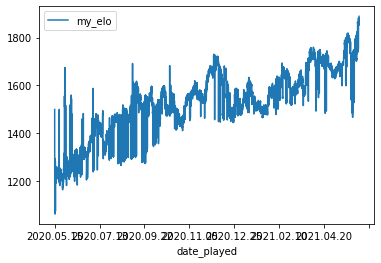

In [17]:
# Visualise the player's elo level over time
df_games.sort_values('date_played').plot(y = 'my_elo', x = 'date_played', kind = 'line')

graph for white_opening


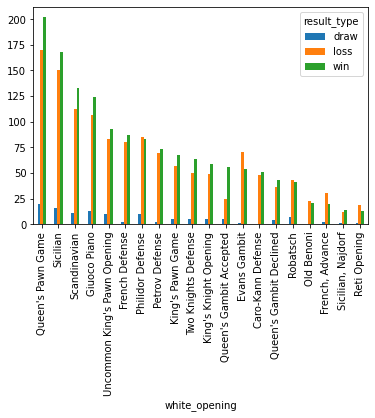

graph for black_opening


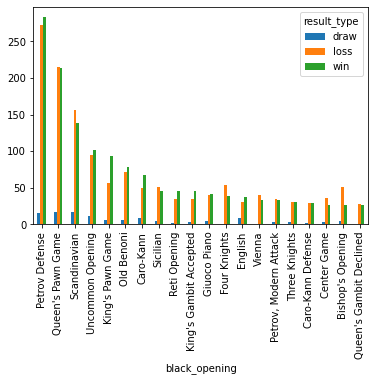

graph for elo_diff_range


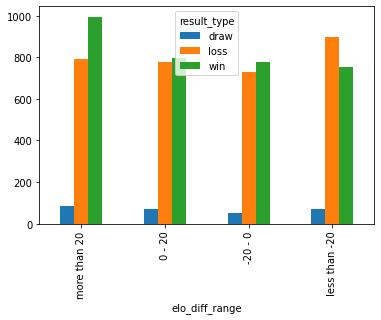

graph for eval_diff_range


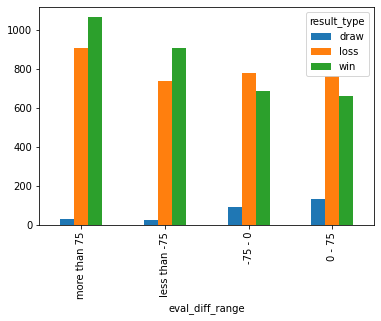

graph for my_color


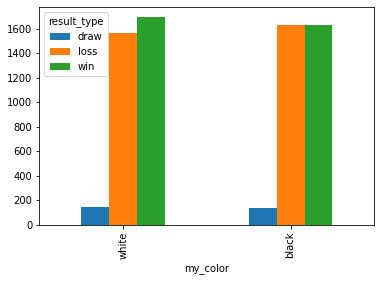

In [18]:
# Visualize winrate ratio according to openings, difference in evaluation and elo and color
columns = ['white_opening', 'black_opening', 'elo_diff_range', 'eval_diff_range', 'my_color']
for column in columns:
    data = df_games[[column, 'result_type']].value_counts().to_frame().reset_index()
    data.columns = [column, 'result_type', 'count']
    data = pd.pivot_table(data, 
                      index = column, 
                      columns = 'result_type', 
                      values = 'count', 
                      fill_value = 0)
    print("graph for %s" % (column))
    data.nlargest(20, ['win', 'loss', 'draw'], keep='first').plot(kind = 'bar')
    plt.show()